C:\Users\Admin\AppData\Local\Temp\ipykernel_10404\3724879978.py:4: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  coin = pd.read_excel('副本crypto daily prices.xlsx')
C:\Users\Admin\AppData\Local\Temp\ipykernel_10404\3724879978.py:10: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data1.fillna(data1.mean(),inplace=True)


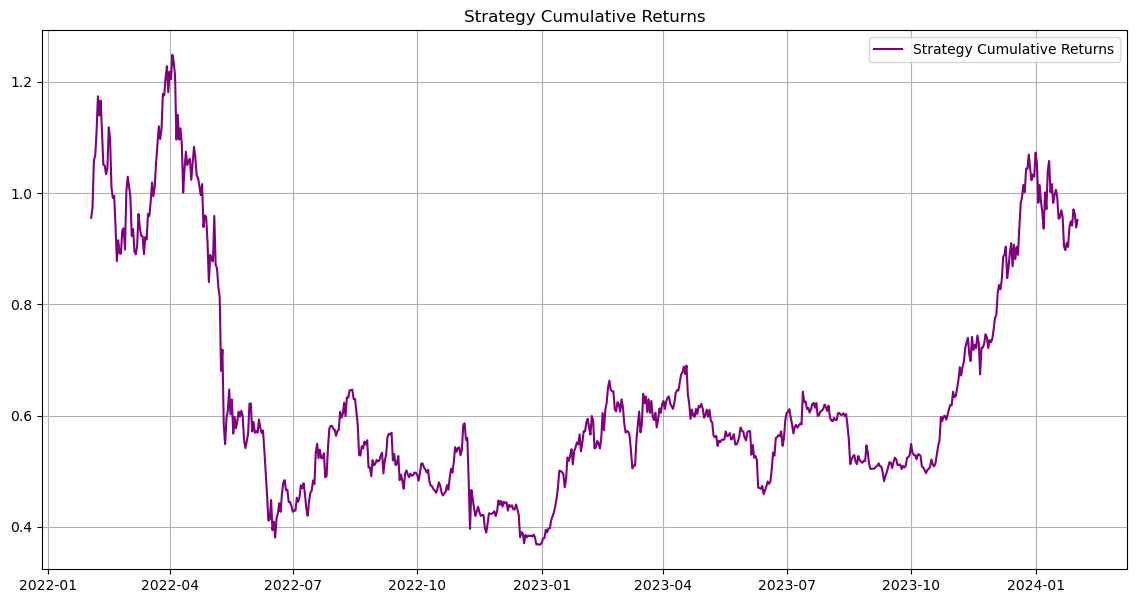

(0.9516642125138957, 0.0006106631989872896, 0.036600382002849395)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
coin = pd.read_excel('副本crypto daily prices.xlsx')
oil = pd.read_excel('新建 Microsoft Excel 工作表.xlsx')
oil=oil.rename(columns={'observation_date':'Date','DCOILBRENTEU_20240417':'oil_price'})
data1=pd.merge(coin,oil[['Date','oil_price']],
              on=['Date'],
              how='left')
data1.fillna(data1.mean(),inplace=True)
data1.set_index('Date',inplace=True)
# Calculate daily returns for each asset
for col in data1.columns:
    data1[col+'_return']=data1[col].pct_change()

import numpy as np
np.random.seed(None)
random_weights = np.random.rand(31)
normalized_weights = random_weights/random_weights.sum()
data1['Strategy_Returns']=data1[list(data1.columns)[31]]*normalized_weights[0]
for i in range(32,len(data1.columns)):
    data1['Strategy_Returns']=data1['Strategy_Returns']+data1[list(data1.columns)[i]]*normalized_weights[i-32]


# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(data1.index, (data1['Strategy_Returns'] + 1).cumprod(), label='Strategy Cumulative Returns', color='purple')
plt.title('Strategy Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# Return statistics
cumulative_returns = (data1['Strategy_Returns'] + 1).cumprod().iloc[-1]
cumulative_returns, data1['Strategy_Returns'].mean(), data1['Strategy_Returns'].std()